In [234]:
import requests
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

In [286]:
%matplotlib agg
#%matplotlib inline

In [4]:
os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

In [248]:
win_rate_by_interval = load_csv_dataset('Analysis_Q1/win_rate_by_MV_interval_by_country.csv')

In [249]:
latest_match_data = load_csv_dataset('Analysis_Q1/latest_match_data_june_18_SUPERSTAR_INFO_ADDED.csv')

In [250]:
win_rate_by_interval['Confederation'] = ''
for index, row in win_rate_by_interval.iterrows():
    country = row['Team Name']
    confederation = latest_match_data[latest_match_data['Team.2.Name'] == country]['Team.2.Confederation'].unique()[0]
    print(f'{country} is in {confederation}')
    win_rate_by_interval.at[index, 'Confederation'] = confederation


Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Afghanistan is in AFC
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Albania is in UEFA
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in CAF
Algeria is in C

In [251]:
win_rate_by_interval[['Interval Range Min', 'Interval Range Max']] = win_rate_by_interval['Interval Range'].str.extract(r'\$(-?\d+\.?\d*)\s*-\s*\$(-?\d+\.?\d*)')
win_rate_by_interval['Interval Range Min'] = pd.to_numeric(win_rate_by_interval['Interval Range Min'])
win_rate_by_interval['Interval Range Max'] = pd.to_numeric(win_rate_by_interval['Interval Range Max'])

# PLOTS - Q2

## Winner side plot

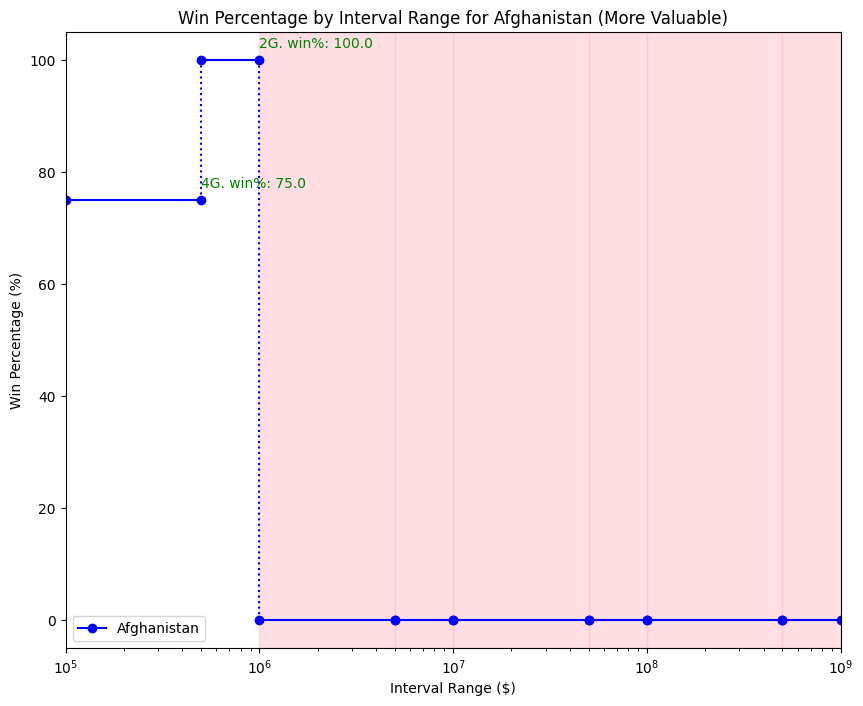

In [127]:
# Filter the dataset for AFC, where the team is more valuable, and specifically for Afghanistan
afghanistan_data = win_rate_by_interval[(win_rate_by_interval['Confederation'] == 'AFC') & 
                                        (win_rate_by_interval['Interval Side'] == 'More Valuable') & 
                                        (win_rate_by_interval['Team Name'] == 'Afghanistan')]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Set the x-axis to a logarithmic scale and specify the range from 10^5 to 10^9
ax.set_xscale('log')
ax.set_xlim(1e5, 1e9)  # Set the range of x-axis from 10^5 to 10^9

# Initialize a variable to store the previous max interval value and win percentage
previous_max = None
previous_win_percentage = None

# Plot the line for Afghanistan
for _, row in afghanistan_data.iterrows():
    # Plot horizontal line segment
    ax.plot([row['Interval Range Min'], row['Interval Range Max']], [row['Win Percentage'], row['Win Percentage']],
            label='Afghanistan' if previous_max is None else "",  # Label only the first segment to avoid duplicate legend entries
            color='blue', marker='o', linestyle='-')
    
    # If there's a previous segment, plot a vertical line connecting them
    if previous_max is not None and previous_win_percentage is not None:
        ax.vlines(x=previous_max, ymin=previous_win_percentage, ymax=row['Win Percentage'], colors='blue', linestyles='dotted')
    
    # Update previous values
    previous_max = row['Interval Range Max']
    previous_win_percentage = row['Win Percentage']

    # Add text label near the right end of the line only if the win percentage changes
    if previous_win_percentage is None or previous_win_percentage != row['Win Percentage']:
        ax.text(row['Interval Range Max'], row['Win Percentage'], f' Afghanistan', verticalalignment='center', color='blue')

    # Check if Total Matches equals 0 and add a pink vertical highlight over the entire range
    if row['Total Matches'] == 0:
        ax.axvspan(row['Interval Range Min'], row['Interval Range Max'], color='pink', alpha=0.5)  # Highlight the entire interval

    # Add text for non-zero total matches but zero win percentage
    if row['Total Matches'] > 0 and row['Win Percentage'] == 0:
        ax.text(row['Interval Range Max'], row['Win Percentage'] - 5, f'{row["Total Matches"]}G, 0W', verticalalignment='center', color='red')

    # Add text in green for non-zero total matches and non-zero win percentage
    if row['Total Matches'] > 0 and row['Win Percentage'] > 0:
        ax.text(row['Interval Range Max'] - 5, row['Win Percentage'] + 3, f'{row["Total Matches"]}G. win%: {row["Win Percentage"]}', verticalalignment='center', color='green')

ax.set_xlabel('Interval Range ($)')
ax.set_ylabel('Win Percentage (%)')
ax.set_title('Win Percentage by Interval Range for Afghanistan (More Valuable)')

# Display the legend
ax.legend()

plt.show()

## Loser side

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_59506/3131147503.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data_less_valuable['Interval Range Min'] = afghanistan_data_less_valuable['Interval Range Min'].abs()
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_59506/3131147503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data_less_valuable['Interval Range Max'] = afghanistan_data_less_valuable['Interval Range Max'].abs()
/var/folders/vw/z2xv57_n70l

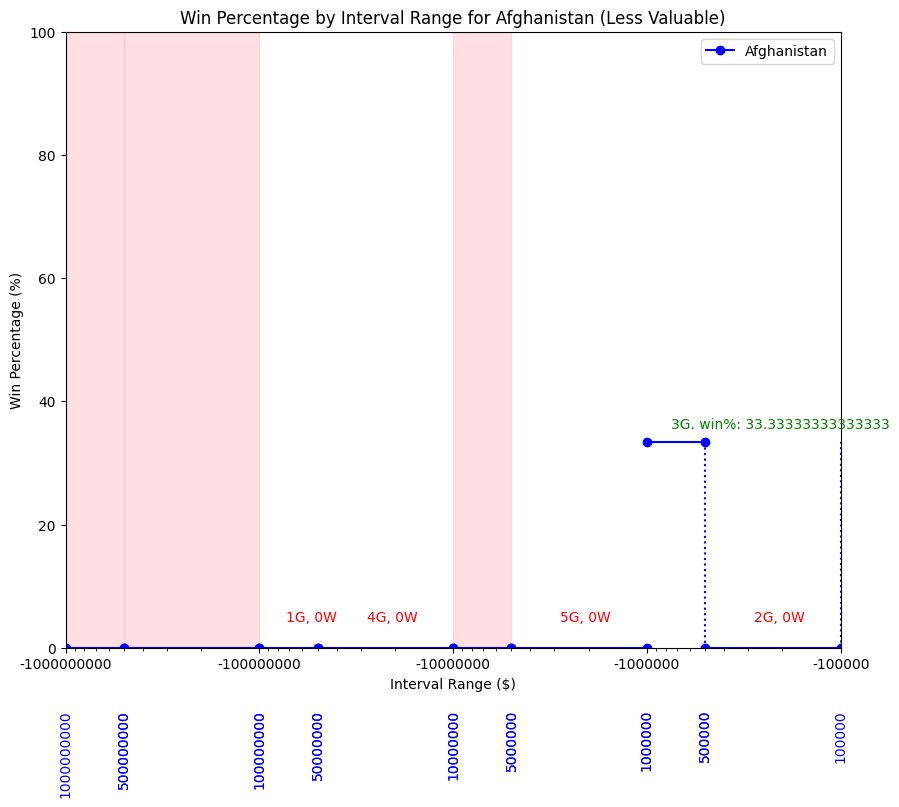

In [134]:
# Filter the dataset for AFC, where the team is less valuable, and specifically for Afghanistan
afghanistan_data_less_valuable = win_rate_by_interval[(win_rate_by_interval['Confederation'] == 'AFC') & 
                                                      (win_rate_by_interval['Interval Side'] == 'Less Valuable') & 
                                                      (win_rate_by_interval['Team Name'] == 'Afghanistan')]

# Ensure the data is not empty
if not afghanistan_data_less_valuable.empty:
    # Convert interval range values to positive for plotting purposes
    afghanistan_data_less_valuable['Interval Range Min'] = afghanistan_data_less_valuable['Interval Range Min'].abs()
    afghanistan_data_less_valuable['Interval Range Max'] = afghanistan_data_less_valuable['Interval Range Max'].abs()

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Set the x-axis to a logarithmic scale and specify the range from 10^9 to 10^5
    ax.set_xscale('log')
    ax.set_xlim(1e9, 1e5)  # Set the range of x-axis from 10^9 to 10^5

    # Set the y-axis to range from 0 to 100%
    ax.set_ylim(0, 100)

    # Initialize a variable to store the previous max interval value and win percentage
    previous_max = None
    previous_win_percentage = None

    # Plot the line for Afghanistan
    for _, row in afghanistan_data_less_valuable.iterrows():
        # Plot horizontal line segment
        ax.plot([row['Interval Range Max'], row['Interval Range Min']], [row['Win Percentage'], row['Win Percentage']],
                label='Afghanistan' if previous_max is None else "",  # Label only the first segment to avoid duplicate legend entries
                color='blue', marker='o', linestyle='-')
        
        # If there's a previous segment, plot a vertical line connecting them
        if previous_max is not None and previous_win_percentage is not None:
            ax.vlines(x=previous_max, ymin=previous_win_percentage, ymax=row['Win Percentage'], colors='blue', linestyles='dotted')
        
        # Update previous values
        previous_max = row['Interval Range Min']
        previous_win_percentage = row['Win Percentage']

        # Check if Total Matches equals 0 and add a pink vertical highlight over the entire range
        if row['Total Matches'] == 0:
            ax.axvspan(row['Interval Range Max'], row['Interval Range Min'], color='pink', alpha=0.5)  # Highlight the entire interval

        # Add text for non-zero total matches but zero win percentage
        if row['Total Matches'] > 0 and row['Win Percentage'] == 0:
            # Calculate the midpoint between Interval Range Max and Interval Range Min
            text_x_position = (row['Interval Range Max'] + row['Interval Range Min']) / 2
            # Move the text slightly to the left by subtracting a small value
            text_x_position -= (row['Interval Range Max'] - row['Interval Range Min']) * 0.05  # Adjust the 0.05 factor as needed
            # Prepend '<--' to the text
            ax.text(text_x_position, row['Win Percentage'] + 5, f'{row["Total Matches"]}G, 0W', verticalalignment='center', color='red')

        # Add text in green for non-zero total matches and non-zero win percentage
        if row['Total Matches'] > 0 and row['Win Percentage'] > 0:
            text_x_position = (row['Interval Range Max'] + row['Interval Range Min']) / 2
            ax.text(text_x_position, row['Win Percentage'] + 3, f'{row["Total Matches"]}G. win%: {row["Win Percentage"]}', verticalalignment='center', color='green')

        # Annotate the x-axis tick mark value at each data point, rotated 90 degrees
        ax.text(row['Interval Range Max'], -10, f'{row["Interval Range Max"]:.0f}', ha='center', va='top', color='blue', rotation=90)
        ax.text(row['Interval Range Min'], -10, f'{row["Interval Range Min"]:.0f}', ha='center', va='top', color='blue', rotation=90)

    # Adjust x-axis tick labels to show negative values
    ticks = ax.get_xticks()
    ax.set_xticklabels([-int(tick) for tick in ticks])

    ax.set_xlabel('Interval Range ($)')
    ax.set_ylabel('Win Percentage (%)')
    ax.set_title('Win Percentage by Interval Range for Afghanistan (Less Valuable)')

    # Display the legend
    ax.legend()

    plt.show()
else:
    print("No data available for Afghanistan with 'Less Valuable' interval side.")

## Both sides

In [381]:
def plot_win_percentage_by_interval(country_name):
    country_confederation = win_rate_by_interval[win_rate_by_interval['Team Name'] == country_name]['Confederation'].iloc[0]

    # Filter the dataset for the specified country where the team is more valuable
    afghanistan_data_more_valuable = win_rate_by_interval[(win_rate_by_interval['Confederation'] == country_confederation) & 
                                                          (win_rate_by_interval['Interval Side'] == 'More Valuable') & 
                                                          (win_rate_by_interval['Team Name'] == country_name)]

    # Filter the dataset for the specified country where the team is less valuable
    afghanistan_data_less_valuable = win_rate_by_interval[(win_rate_by_interval['Confederation'] == country_confederation) & 
                                                          (win_rate_by_interval['Interval Side'] == 'Less Valuable') & 
                                                          (win_rate_by_interval['Team Name'] == country_name)]

    # Ensure the data is not empty
    # if not afghanistan_data_more_valuable.empty and not afghanistan_data_less_valuable.empty:
    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.05)

    # Left plot for negative values
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xscale('symlog')
    ax1.set_xlim(-1e9, -1e5)

    # Right plot for positive values
    ax2 = fig.add_subplot(gs[1])
    ax2.set_xscale('symlog')
    ax2.set_xlim(1e5, 1e9)

    axes = [ax1, ax2]

    for ax in axes:
        ax.set_ylim(0, 120)  # Extend the y-axis to 120%
        ax.set_yticks([0, 20, 40, 60, 80, 100])  # Set y-ticks to only include up to 100%
        ax.set_ylabel('Win Percentage (%)')
        if ax is ax2:
            ax.yaxis.set_tick_params(labelleft=False)  # Hide y-axis labels on the right plot

    # Plot data and annotations on both axes
    for ax, dataset, color, side in [(ax2, afghanistan_data_more_valuable, 'blue', 'More Valuable'), 
                                        (ax1, afghanistan_data_less_valuable, 'red', 'Less Valuable')]:
        previous_max = None
        previous_win_percentage = None
        for _, row in dataset.iterrows():
            # Plot horizontal line segment
            ax.plot([row['Interval Range Max'], row['Interval Range Min']], [row['Win Percentage'], row['Win Percentage']],
                    label=side if previous_max is None else "", color=color, marker='o', linestyle='-')
            
            # Plot dots with size proportional to 'Total Matches'
            # You might want to adjust the scaling factor to get a suitable dot size
            dot_size = (row['Total Matches'] + 1) * 5  # Scale factor to adjust dot size logarithmically  # Scale factor to adjust dot size
            ax.scatter([row['Interval Range Max'], row['Interval Range Min']], [row['Win Percentage'], row['Win Percentage']],
                    color=color, s=dot_size)
            
            # If there's a previous segment, plot a vertical line connecting them
            if previous_max is not None and previous_win_percentage is not None:
                ax.vlines(x=previous_max, ymin=previous_win_percentage, ymax=row['Win Percentage'], colors='blue', linestyles='dotted')
            
            # Add text and highlights
            if row['Total Matches'] == 0:
                ax.axvspan(row['Interval Range Max'], row['Interval Range Min'], color='pink', alpha=0.5)
            if row['Total Matches'] > 0 and row['Win Percentage'] == 0:
                text_x_position = (row['Interval Range Max'] + row['Interval Range Min']) / 2
                ax.text(text_x_position, row['Win Percentage'] + 10, f'{row["Total Matches"]}G/0W', verticalalignment='center', color='red', rotation=90)
            if row['Total Matches'] > 0 and row['Win Percentage'] > 0:
                text_x_position = (row['Interval Range Max'] + row['Interval Range Min']) / 2
                ax.text(text_x_position - 100000, row['Win Percentage'] + 13, f'{round(row["Win Percentage"], 1)}%({row["Total Matches"]})', verticalalignment='center', color='green', rotation=90)

            # Update previous values
            previous_max = row['Interval Range Max']
            previous_win_percentage = row['Win Percentage']

            # Annotate the x-axis tick mark value at each data point, rotated 90 degrees
            ax.text(row['Interval Range Max'], -5, f'{format_number(row["Interval Range Max"])}', ha='center', va='top', color='blue', rotation=90)
            ax.text(row['Interval Range Min'], -5, f'{format_number(row["Interval Range Min"])}', ha='center', va='top', color='blue', rotation=90)


    # Add vertical lines for Max and Min Squad MV Difference vs Opponent
    max_diff = dataset['Max Squad MV Difference vs Opponent'].max()
    min_diff = dataset['Min Squad MV Difference vs Opponent'].min()
    ax.axvline(x=max_diff, color='green', linestyle='--', label='Max Squad MV Difference')
    ax.axvline(x=min_diff / 1, color='red', linestyle='--', label='Min Squad MV Difference')

    # Calculate a small offset to move the text closer to the line
    offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01  # 1% of the axis range

    # Adjust text position based on the value of max_diff
    if max_diff > ax.get_xlim()[1] - (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.1:  # If max_diff is within the rightmost 10% of the plot
        text_alignment = 'right'
        text_x_position = max_diff - offset  # Move text to the left of the line
    else:
        text_alignment = 'left'
        text_x_position = max_diff + offset  # Maintain original position

    #ax.text(max_diff, 110, f'Max: {max_diff}', verticalalignment='bottom', horizontalalignment=text_alignment, color='green')
    #ax.text(min_diff * 5, 110, f'Min: {format_number(min_diff)}', verticalalignment='bottom', horizontalalignment='left', color='red')
    ax.text(-0.02, 0.95, f'Min: {format_number(min_diff)}', verticalalignment='top', horizontalalignment='right', color='red', transform=ax1.transAxes)


    # Add a vertical line for Max Squad MV Difference vs Opponent in the 'More Valuable' plot
    max_diff = afghanistan_data_more_valuable['Max Squad MV Difference vs Opponent'].max()
    ax2.axvline(x=max_diff, color='green', linestyle='--', label='Max Squad MV Difference')

    # Optionally, add a label to the line
    #ax2.text(max_diff + 10500000, ax2.get_ylim()[1] * 0.95, f'Max: {format_number(max_diff)}', verticalalignment='top', horizontalalignment='right', color='green')
    ax2.text(1.02, 0.95, f'Max: {format_number(max_diff)}', verticalalignment='top', horizontalalignment='left', color='green', transform=ax2.transAxes)

    max_squad_mv = afghanistan_data_more_valuable['Max Squad MV'].max()
    fig.text(0.95, .97, f'Max Squad MV: {format_number(max_squad_mv)}', verticalalignment='bottom', horizontalalignment='right', fontsize=12, color='black')
    min_squad_mv = afghanistan_data_more_valuable['Min Squad MV'].min()
    fig.text(0.95, .93, f'Min Squad MV: {format_number(min_squad_mv)}', verticalalignment='bottom', horizontalalignment='right', fontsize=12, color='black')


    ax1.set_title('Negative Values (Less Valuable)')
    ax2.set_title('Positive Values (More Valuable)')
    fig.suptitle(f'Combined Win Percentage by Interval Range for {country_name}')
    plt.savefig(f'/Users/finneganlaister-smith/Downloads/PLOTS_COUNTRIES_WINPCT_INTERVAL/{country_confederation}/plot_{country_name}.png')
    # else:
        # print(f"No data available for {country_name} with specified interval sides.")

In [375]:
def format_number(num):
    if abs(num) >= 1_000_000:
        formatted = f"{num / 1_000_000:.0f}M"
    elif abs(num) >= 1_000:
        formatted = f"{num / 1_000:.0f}K"
    else:
        formatted = str(num)
    return formatted if num >= 0 else f"{formatted}"

In [383]:
for team_name in win_rate_by_interval['Team Name'].unique():
    plot_win_percentage_by_interval(team_name)     

In [382]:
plot_win_percentage_by_interval('France') 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


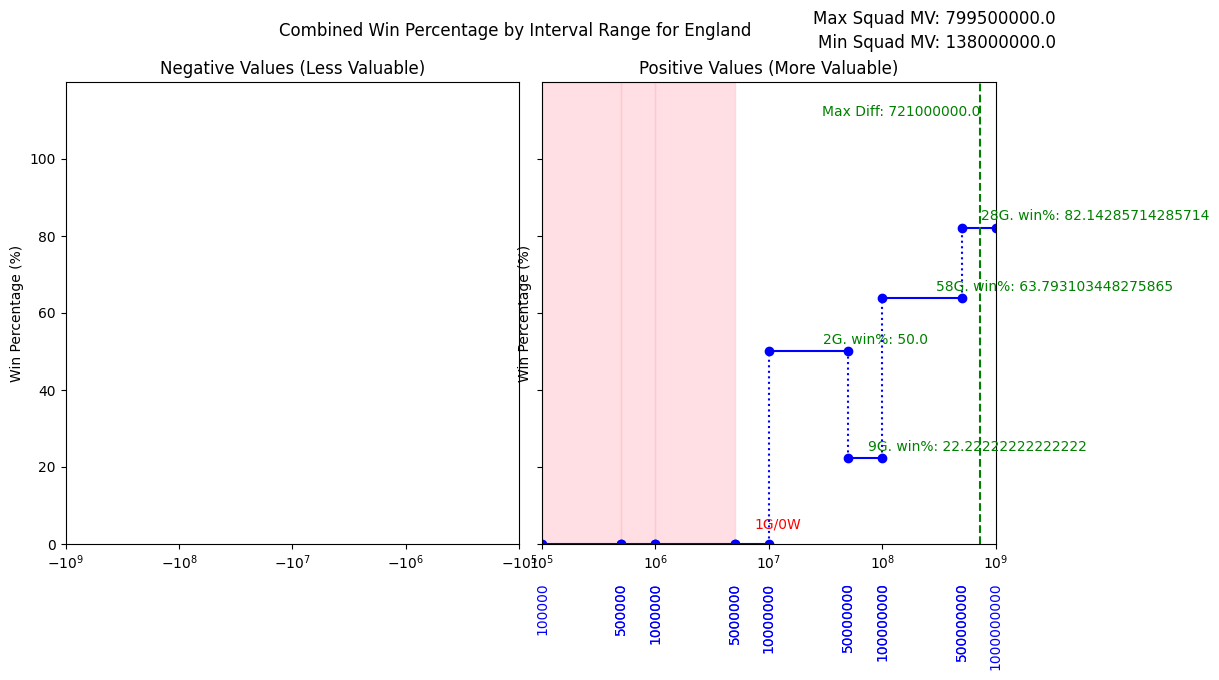

In [280]:
#OLD PLOT CODE - FOR DEBUGGING
country_name = 'England'

country_confederation = win_rate_by_interval[win_rate_by_interval['Team Name'] == country_name]['Confederation'].iloc[0]

# Filter the dataset for AFC, where the team is more valuable, and specifically for Afghanistan
afghanistan_data_more_valuable = win_rate_by_interval[(win_rate_by_interval['Confederation'] == country_confederation) & 
                                                      (win_rate_by_interval['Interval Side'] == 'More Valuable') & 
                                                      (win_rate_by_interval['Team Name'] == country_name)]

# Filter the dataset for AFC, where the team is less valuable, and specifically for Afghanistan
afghanistan_data_less_valuable = win_rate_by_interval[(win_rate_by_interval['Confederation'] == country_confederation) & 
                                                      (win_rate_by_interval['Interval Side'] == 'Less Valuable') & 
                                                      (win_rate_by_interval['Team Name'] == country_name)]

# Ensure the data is not empty
#if not afghanistan_data_more_valuable.empty and not afghanistan_data_less_valuable.empty:
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.05)

# Left plot for negative values excluding -100000 to 0
ax1 = fig.add_subplot(gs[0])
ax1.set_xscale('symlog')
ax1.set_xlim(-1e9, -1e5)

# Right plot for positive values excluding 0 to 100000
ax2 = fig.add_subplot(gs[1])
ax2.set_xscale('symlog')
ax2.set_xlim(1e5, 1e9)

axes = [ax1, ax2]

for ax in axes:
    ax.set_ylim(0, 120)  # Extend the y-axis to 120%
    ax.set_yticks([0, 20, 40, 60, 80, 100])  # Set y-ticks to only include up to 100%
    ax.set_ylabel('Win Percentage (%)')
    if ax is ax2:
        ax.yaxis.set_tick_params(labelleft=False)  # Hide y-axis labels on the right plot

# Plot data and annotations on both axes
for ax, dataset, color, side in [(ax2, afghanistan_data_more_valuable, 'blue', 'More Valuable'), 
                                    (ax1, afghanistan_data_less_valuable, 'red', 'Less Valuable')]:
    previous_max = None
    previous_win_percentage = None
    for _, row in dataset.iterrows():
        # Plot horizontal line segment
        ax.plot([row['Interval Range Max'], row['Interval Range Min']], [row['Win Percentage'], row['Win Percentage']],
                label=side if previous_max is None else "", color=color, marker='o', linestyle='-')
        
        # If there's a previous segment, plot a vertical line connecting them
        if previous_max is not None and previous_win_percentage is not None:
            ax.vlines(x=previous_max, ymin=previous_win_percentage, ymax=row['Win Percentage'], colors='blue', linestyles='dotted')
        
        # Add text and highlights
        if row['Total Matches'] == 0:
            ax.axvspan(row['Interval Range Max'], row['Interval Range Min'], color='pink', alpha=0.5)
        if row['Total Matches'] > 0 and row['Win Percentage'] == 0:
            text_x_position = (row['Interval Range Max'] + row['Interval Range Min']) / 2
            ax.text(text_x_position, row['Win Percentage'] + 5, f'{row["Total Matches"]}G/0W', verticalalignment='center', color='red')
        if row['Total Matches'] > 0 and row['Win Percentage'] > 0:
            text_x_position = (row['Interval Range Max'] + row['Interval Range Min']) / 2
            ax.text(text_x_position, row['Win Percentage'] + 3, f'{row["Total Matches"]}G. win%: {row["Win Percentage"]}', verticalalignment='center', color='green')

        # Update previous values
        previous_max = row['Interval Range Max']
        previous_win_percentage = row['Win Percentage']

        # Annotate the x-axis tick mark value at each data point, rotated 90 degrees
        ax.text(row['Interval Range Max'], -10, f'{row["Interval Range Max"]:.0f}', ha='center', va='top', color='blue', rotation=90)
        ax.text(row['Interval Range Min'], -10, f'{row["Interval Range Min"]:.0f}', ha='center', va='top', color='blue', rotation=90)

# Add vertical lines for Max and Min Squad MV Difference vs Opponent
max_diff = dataset['Max Squad MV Difference vs Opponent'].max()
min_diff = dataset['Min Squad MV Difference vs Opponent'].min()
ax.axvline(x=max_diff, color='green', linestyle='--', label='Max Squad MV Difference')
ax.axvline(x=min_diff / 1, color='red', linestyle='--', label='Min Squad MV Difference')

# Calculate a small offset to move the text closer to the line
offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01  # 1% of the axis range

# Adjust text position based on the value of max_diff
if max_diff > ax.get_xlim()[1] - (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.1:  # If max_diff is within the rightmost 10% of the plot
    text_alignment = 'right'
    text_x_position = max_diff - offset  # Move text to the left of the line
else:
    text_alignment = 'left'
    text_x_position = max_diff + offset  # Maintain original position

#ax.text(max_diff, 110, f'Max: {max_diff}', verticalalignment='bottom', horizontalalignment=text_alignment, color='green')
ax.text(min_diff, 110, f'Max (neg): {min_diff}', verticalalignment='bottom', horizontalalignment='left', color='red')

# Add a vertical line for Max Squad MV Difference vs Opponent in the 'More Valuable' plot
max_diff = afghanistan_data_more_valuable['Max Squad MV Difference vs Opponent'].max()
ax2.axvline(x=max_diff, color='green', linestyle='--', label='Max Squad MV Difference')

# Optionally, add a label to the line
ax2.text(max_diff + 10500000, ax2.get_ylim()[1] * 0.95, f'Max Diff: {max_diff}', verticalalignment='top', horizontalalignment='right', color='green')
max_squad_mv = afghanistan_data_more_valuable['Max Squad MV'].max()
fig.text(0.95, .97, f'Max Squad MV: {max_squad_mv}', verticalalignment='bottom', horizontalalignment='right', fontsize=12, color='black')
min_squad_mv = afghanistan_data_more_valuable['Min Squad MV'].min()
fig.text(0.95, .93, f'Min Squad MV: {min_squad_mv}', verticalalignment='bottom', horizontalalignment='right', fontsize=12, color='black')
ax1.set_title('Negative Values (Less Valuable)')
ax2.set_title('Positive Values (More Valuable)')
fig.suptitle(f'Combined Win Percentage by Interval Range for {country_name}')
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=2)
#plt.show()
plt.savefig(f'/Users/finneganlaister-smith/Downloads/PLOTS_COUNTRIES_WINPCT_INTERVAL/{country_confederation}/plot_{country_name}.png')
#else:
    #print(f"No data available for Afghanistan with specified interval sides.")